# Python OOP - Excercise

## I. Câu hỏi tự luận

### 1. Viết class và cài phương thức softmax

$softmax(x) = \frac{exp(x_1)}{\sum^n_{j=1}exp(x_j)}$

$softmax\_stable(x) = \frac{exp(x_1-c)}{\sum^n_{j=1}exp(x_j-c)}$

$c = max(x)$

In [2]:
import torch
import torch.nn as nn

class Softmax(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        x = torch.exp(x)
        return x/sum(x)
class Softmax_stable(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        x = torch.exp(x-max(x))
        return x/sum(x)


In [3]:
# Examples 1
data = torch.Tensor([1, 2, 3])
softmax = Softmax()
output = softmax(data)
print(output)
# >> tensor ([0.0900 , 0.2447 , 0.6652])

data = torch.Tensor([1, 2, 3])
softmax_stable = Softmax_stable()
output = softmax_stable(data)
print(output)
# >> tensor ([0.0900 , 0.2447 , 0.6652])

tensor([0.0900, 0.2447, 0.6652])
tensor([0.0900, 0.2447, 0.6652])


C:\Users\xps15\AppData\Local\Temp\ipykernel_27644\3188146164.py:2: UserWarning: Failed to initialize NumPy: No module named 'numpy' (Triggered internally at ..\torch\csrc\utils\tensor_numpy.cpp:84.)
  data = torch.Tensor([1, 2, 3])


In [4]:
new_data = torch.Tensor([1, 2, 300000000])
output = softmax(new_data)
output

tensor([0., 0., nan])

In [5]:
new_data = torch.Tensor([1, 2, 300000000])
output = softmax_stable(new_data)
output

tensor([0., 0., 1.])

### 2. Một Ward (phường) gồm có name (string) và danh sách của mọi người trong Ward. Một người person có thể là student, doctor, hoặc teacher. Một student gồm có name, yob (int) (năm sinh), và grade (string). Một teacher gồm có name, yob, và subject (string). Một doctor gồm có name, yob, và specialist (string). Lưu ý cần sử dụng a list để chứa danh sách của mọi người trong Ward.

- (a) Cài đặt các class Student, Doctor, và Teacher theo mô tả trên. Thực hiện phương thức
describe() method để in ra tất cả thông tin của các object.

In [6]:
from abc import ABC, abstractmethod

class Person(ABC):
    def __init__(self, name:str, yob:int):
        self._name = name
        self._yob = yob

    def get_yob(self):
        return self._yob

    @abstractmethod
    def describe(self):
        pass


class Student(Person):
    def __init__(self, name:str, yob:int, grade:str):
        super().__init__(name=name, yob=yob)
        self.__grade = grade

    def describe(self):
        print(f"Student - Name: {self._name} - YoB: {self._yob} - Grade: {self.__grade}")


class Teacher(Person):
    def __init__(self, name:str, yob:int, subject:str):
        super().__init__(name=name, yob=yob)
        self.__subject = subject

    def describe(self):
        print(f"Teacher - Name: {self._name} - YoB: {self._yob} - Subject: {self.__subject}")


class Doctor(Person):
    def __init__(self, name:str, yob:int, specialist:str):
        super().__init__(name=name, yob=yob)
        self.__specialist = specialist

    def describe(self):
        print(f"Doctor - Name: {self._name} - YoB: {self._yob} - Specialist: {self.__specialist}")

In [7]:
# Examples
# 2(a)
student1 = Student(name="studentA", yob=2010 , grade="7")
student1.describe ()
#output
# >> Student - Name: studentA - YoB: 2010 - Grade: 7

teacher1 = Teacher(name="teacherA", yob=1969 , subject="Math")
teacher1.describe ()
#output
# >> Teacher - Name: teacherA - YoB: 1969 - Subject: Math

doctor1 = Doctor(name="doctorA", yob =1945, specialist="Endocrinologists")
doctor1.describe ()
#output
# >> Doctor - Name: doctorA - YoB: 1945 - Specialist: Endocrinologists

Student - Name: studentA - YoB: 2010 - Grade: 7
Teacher - Name: teacherA - YoB: 1969 - Subject: Math
Doctor - Name: doctorA - YoB: 1945 - Specialist: Endocrinologists


- (b) Viết add_person(person) method trong Ward class để add thêm một người mới với nghề nghiệp bất kỳ (student, teacher, doctor) vào danh sách người của ward. Tạo ra một ward object, và thêm vào 1 student, 2 teacher, và 2 doctor. Thực hiện describe() method để in ra tên ward (name) và toàn bộ thông tin của từng người trong ward.


In [27]:
class Ward:
    def __init__(self, name: str):
        self.__name = name
        self.__list_people = []
    def add_person(self, person: Person):
        self.__list_people.append(person)
    def describe(self):
        print(f"Ward Name: {self.__name}")
        for p in self.__list_people:
            p.describe()
    def count_doctor(self):
        c = 0
        for p in self.__list_people:
            if type(p) is Doctor:
                c += 1
        return c
    def sort_age(self):
        self.__list_people.sort(key = lambda p: p.get_yob() , reverse= True)
    def compute_average(self):
        c = 0
        sum_year = 0
        for p in self.__list_people:
            if type(p) is Teacher:
                c += 1
                sum_year += p.get_yob()
        return sum_year/c


In [28]:
# 2(b)
print()
teacher2 = Teacher(name="teacherB", yob=1995 , subject="History")
doctor2 = Doctor(name="doctorB", yob =1975, specialist="Cardiologists")
ward1 = Ward(name="Ward1")
ward1.add_person(student1)
ward1.add_person(teacher1)
ward1.add_person(teacher2)
ward1.add_person(doctor1)
ward1.add_person(doctor2)
ward1.describe()

#output
# >> Ward Name: Ward1
# Student - Name: studentA - YoB: 2010 - Grade: 7
# Teacher - Name: teacherA - YoB: 1969 - Subject: Math
# Teacher - Name: teacherB - YoB: 1995 - Subject: History
# Doctor - Name: doctorA - YoB: 1945 - Specialist: Endocrinologists
# Doctor - Name: doctorB - YoB: 1975 - Specialist: Cardiologists


Ward Name: Ward1
Student - Name: studentA - YoB: 2010 - Grade: 7
Teacher - Name: teacherA - YoB: 1969 - Subject: Math
Teacher - Name: teacherB - YoB: 1995 - Subject: History
Doctor - Name: doctorA - YoB: 1945 - Specialist: Endocrinologists
Doctor - Name: doctorB - YoB: 1975 - Specialist: Cardiologists


- (c) Viết count_doctor() method để đếm số lượng doctor trong ward.


In [29]:
# 2(c)
print(f"\nNumber of doctors: {ward1.count_doctor()}")

#output
# >> Number of doctors: 2


Number of doctors: 2


- (d) Viết sort_age() method để sort mọi người trong ward theo tuổi của họ với thứ tự tăng dần.
(hint: Có thể sử dụng sort của list hoặc viết thêm function đều được)


In [30]:
# 2(d)
print("\nAfter sorting Age of Ward1 people")
ward1.sort_age()
ward1.describe()

#output
# >> After sorting Age of Ward1 people
# Ward Name: Ward1
# Student - Name: studentA - YoB: 2010 - Grade: 7
# Teacher - Name: teacherB - YoB: 1995 - Subject: History
# Doctor - Name: doctorB - YoB: 1975 - Specialist: Cardiologists
# Teacher - Name: teacherA - YoB: 1969 - Subject: Math
# Doctor - Name: doctorA - YoB: 1945 - Specialist: Endocrinologists



After sorting Age of Ward1 people
Ward Name: Ward1
Student - Name: studentA - YoB: 2010 - Grade: 7
Teacher - Name: teacherB - YoB: 1995 - Subject: History
Doctor - Name: doctorB - YoB: 1975 - Specialist: Cardiologists
Teacher - Name: teacherA - YoB: 1969 - Subject: Math
Doctor - Name: doctorA - YoB: 1945 - Specialist: Endocrinologists


- (e) Viết compute_average() method để tính trung bình năm sinh của các teachers trong ward.

In [31]:
# 2(e)
print(f"\nAverage year of birth (teachers): {ward1.compute_average()}")

#output
# >> Average year of birth (teachers): 1982.0


Average year of birth (teachers): 1982.0


### 3. Thực hiện xây dựng class Stack với các phương thức (method) sau đây
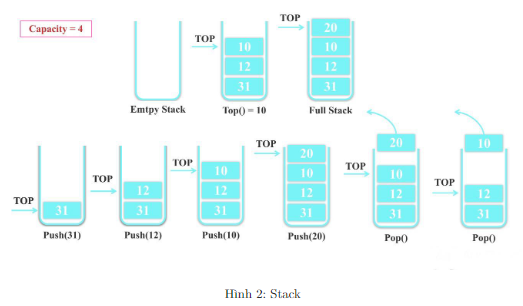

- initialization method nhận một input "capacity": dùng để khởi tạo stack với capacity là số
lượng element mà stack có thể chứa
- is_empty(): kiểm tra stack có đang rỗng
- is_full(): kiểm tra stack đã full chưa
- pop(): loại bỏ top element và trả về giá trị đó
- push(value) add thêm value vào trong stack
- top() lấy giá trị top element hiện tại của stack, nhưng không loại bỏ giá trị đó
- Không cần thiết phải thực hiện với pointer như trong hình minh họa

In [33]:
class MyStack:
    def __init__(self, capacity):
        self.__capacity = capacity
        self.__stack = []

    def is_empty(self):
        return len(self.__stack) == 0

    def is_full(self):
        return len(self.__stack) == self.__capacity

    def pop(self):
        if self.is_empty():
            raise Exception("Underflow")
        return self.__stack.pop()

    def push(self, value):
        if self.is_full():
            raise Exception("Overflow")

        self.__stack.append(value)

    def top(self):
        if self.is_empty():
            print("Queue is empty")
            return
        return self.__stack[-1]

In [35]:
stack1 = MyStack(capacity=5)
stack1.push(1)
stack1.push(2)
print(stack1.is_full())
# >> False
print(stack1.top())
# >>2
print(stack1.pop())
# >> 2
print(stack1.top())
# >> 1
print(stack1.pop())
# >> 1
print(stack1.is_empty())
# >> True

False
2
2
1
1
True


### 4. Thực hiện xây dựng class Queue với các chức năng (method) sau đây
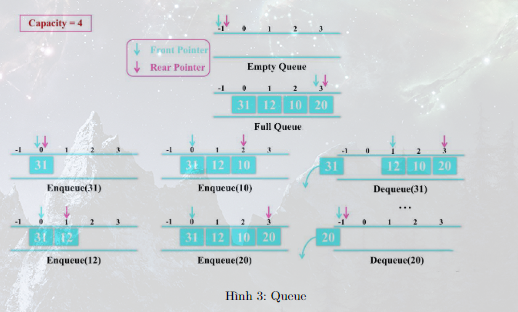

- initialization method nhận một input "capacity": dùng để khởi tạo queue với capacity là
số lượng element mà queue có thể chứa
- is_empty(): kiểm tra queue có đang rỗng
- is_full(): kiểm tra queue đã full chưa
- dequeue(): loại bỏ first element và trả về giá trị đó
- enqueue(value) add thêm value vào trong queue
- front() lấy giá trị first element hiện tại của queue, nhưng không loại bỏ giá trị đó
- Không cần thiết phải thực hiện với các pointers như trong hình minh họa

In [37]:
class MyQueue:
    def __init__(self, capacity):
        self.__capacity = capacity
        self.__queue = []

    def is_empty(self):
        return len(self.__queue) == 0

    def is_full(self):
        return len(self.__queue) == self.__capacity

    def dequeue(self):
        if self.is_empty():
            raise Exception("Underflow")
        return self.__queue.pop(0)

    def enqueue(self, value):
        if self.is_full():
            raise Exception("Overflow")
        self.__queue.append(value)

    def front(self):
        if self.is_empty():
            print("Queue is empty")
            return
        return self.__queue[0]

In [38]:
queue1 = MyQueue(capacity =5)
queue1.enqueue(1)
queue1.enqueue(2)
print(queue1.is_full ())
# >> False
print(queue1.front ())
# >> 1
print(queue1.dequeue ())
# >> 1
print(queue1.front ())
# >> 2
print(queue1.dequeue ())
# >> 2
print(queue1.is_empty ())
# >> True

False
1
1
2
2
True


## II. Câu hỏi trắc nghiệm

### Câu hỏi 1: Kết quả của đoạn code dưới đây là bao nhiêu.
a) [0.0900, 0.2747, 0.6652]

b) [0.0700, 0.2447, 0.6652]

c) [0.0900, 0.2447, 0.6652]

d) [0.1900, 0.2447, 0.6692]

In [40]:
data = torch.Tensor ([1, 2, 3])
softmax_function = nn.Softmax(dim=0)
output = softmax_function(data)
assert round(output [0]. item(), 2) == 0.09
output

tensor([0.0900, 0.2447, 0.6652])

### Câu hỏi 2:Hoàn thành đoạn code sau đây theo công thức tính softmax.
a) [0.0900, 0.2747, 0.6652]

b) [0.7054, 0.0351, 0.2595]

c) [0.0900, 0.2447, 0.6652]

d) [0.7054, 0.0351, 0.009]

In [41]:
data = torch.Tensor ([5, 2, 4])
my_softmax = Softmax ()
output = my_softmax(data)
assert round(output [-1]. item(), 2) == 0.26
output

tensor([0.7054, 0.0351, 0.2595])

### Câu hỏi 3: Hoàn thành đoạn code sau đây theo công thức tính softmax.
a) [0.0900, 0.2747, 0.6652]

b) [0.7054, 0.0351, 0.2595]

c) [0., 0., nan]

d) [0.7054, 0.0351, 0.009]

In [43]:
data = torch.Tensor ([1, 2, 300000000])
my_softmax = Softmax()
output = my_softmax(data)
assert round(output [0]. item(), 2) == 0.0
output

tensor([0., 0., nan])

### Câu hỏi 4: Hoàn thành đoạn code sau đây theo công thức tính stable softmax.
a) [0.0900, 0.2747, 0.6652]

b) [0.0900, 0.2447, 0.6652]

c) [0., 0., nan]

d) [0.7054, 0.0351, 0.009]

In [45]:
data = torch.Tensor ([1, 2, 3])
softmax_stable = Softmax_stable()
output = softmax_stable(data)
assert round(output [-1]. item(), 2) == 0.67
output

tensor([0.0900, 0.2447, 0.6652])

### Câu hỏi 5: Một người (person) có thể là student, doctor, hoặc teacher. Một student gồm có name (string), yob (int) (năm sinh), và grade (string). Các bạn thực hiện viết class Student theo mô tả trên (Các bạn sẽ viết thêm describe() method để print ra tất cả thông tin của object) và kết quả đầu ra là gì? Chọn đáp án đúng nhất bên dưới.
a) Student - Name: studentZ2023 - YoB: 2011 - Grade: 6

b) Student - Name: studentZ2023 - YoB: 6 - Grade: 2011

c) Student - Name: 6 - YoB: studentZ2023 - Grade: 2011

d) Tất cả đều sai


In [46]:
student1 = Student(name="studentZ2023", yob=2011, grade="6")
assert student1._yob == 2011
student1.describe ()

Student - Name: studentZ2023 - YoB: 2011 - Grade: 6


### Câu hỏi 6: Một người (person) có thể là student, doctor, hoặc teacher. Một teacher gồm có name (string), yob (int), và subject (string). Các bạn thực hiện viết class Teacher theo mô tả trên (Các bạn sẽ viết thêm describe() method để print ra tất cả thông tin của object) và kết quả đầu ra là gì? Chọn đáp án đúng nhất bên dưới.
a) Teacher - Name: 1991 - YoB: teacherZ2023 - Subject: History

b) Teacher - Name: teacherZ2023 - YoB: 1991 - Subject: History

c) Teacher - Name: History - YoB: teacherZ2023 - Subject: 1991

d) Tất cả đều sai

In [48]:
teacher1 = Teacher(name="teacherZ2023", yob=1991, subject="History")
assert teacher1._yob == 1991
teacher1.describe()

Teacher - Name: teacherZ2023 - YoB: 1991 - Subject: History


### Câu hỏi 7: Một người (person) có thể là student, doctor, hoặc teacher. Một doctor gồm có name (string), yob (string), và specialist (string). Các bạn thực hiện viết class Teacher theo mô tả trên (Các bạn sẽ viết thêm describe() method để print ra tất cả thông tin của object) và kết quả đầu ra là gì? Chọn đáp án đúng nhất bên dưới.
a) Doctor - Name: doctorZ2023 - YoB: 1981 - Specialist: Endocrinologists

b) Doctor - Name: 1981 - YoB: doctorZ2023 - Specialist: Endocrinologists

c) Teacher - Name: History - YoB: teacherZ2023 - Subject: 1991

d) Tất cả đều sai


In [50]:
doctor1 = Doctor(name="doctorZ2023", yob =1981 , specialist="Endocrinologists")
assert doctor1._yob == 1981
doctor1.describe()

Doctor - Name: doctorZ2023 - YoB: 1981 - Specialist: Endocrinologists


### Câu hỏi 8: Một Ward gồm có name (string) và danh sách của mọi người trong Ward. Một người person có thể là student, doctor, hoặc teacher và cần sử dụng một list để chứa danh sách của mọi người trong Ward. Viết add_person(person) method trong Ward class để add thêm một người mới với nghề nghiệp bất kỳ (student, teacher, doctor) vào danh sách người của ward. Tạo ra một ward object, và thêm vào 1 student, 2 teacher, và 2 doctor. Thực hiện describe() method để in ra tên ward (name) và toàn bộ thông tin của từng người trong ward. Chọn đáp án đúng nhất bên dưới cho phương thức đếm số lượng doctor.
a) 4

b) 3

c) 2

d) 1

In [54]:
student1 = Student(name="studentA", yob=2010 , grade="7")
teacher1 = Teacher(name="teacherA", yob=1969 , subject="Math")
teacher2 = Teacher(name="teacherB", yob=1995 , subject="History")
doctor1 = Doctor(name="doctorA", yob =1945, specialist="Endocrinologists")
doctor2 = Doctor(name="doctorB", yob =1975, specialist="Cardiologists")
ward1 = Ward(name="Ward1")
ward1.add_person(student1)
ward1.add_person(teacher1)
ward1.add_person(teacher2)
ward1.add_person(doctor1)
assert ward1.count_doctor() == 1
ward1.add_person(doctor2)

ward1.count_doctor()

2

### Câu hỏi 9: Thực hiện xây dựng class Stack với các chức năng (method) sau đây: initial- ization method nhận một input "capacity": dùng để khởi tạo stack với capacity là số lượng element mà stack có thể chứa. .is_full(): kiểm tra stack đã full chưa. .push(value) add thêm value vào trong stack. Kết quả đầu ra là gì?

a) True

b) False

c) None

d) Raise an error

In [57]:
stack1 = MyStack(capacity =5)
stack1.push(1)
assert stack1.is_full() == False
stack1.push(2)
print(stack1.is_full())

False


### Câu hỏi 10: Thực hiện xây dựng class Stack với các chức năng (method) sau đây: initialization method nhận một input "capacity", dùng để khởi tạo stack với capacity là số lượng element mà stack có thể chứa. Phương thức is_empty(): kiểm tra stack có đang rỗng. Phương thức is_full(): kiểm tra stack đã full chưa. Phương thức push(value) add thêm value vào trong stack. Phương thức top() lấy giá trị top element hiện tại của stack, nhưng không loại bỏ giá trị đó. Kết quả đầu ra là gì?

a) 1

b) 2

c) None

d) Raise an error

In [58]:
stack1 = MyStack(capacity =5)
stack1.push(1)
assert stack1.is_full () == False
stack1.push(2)
print(stack1.top())

2


### Câu hỏi 11: Thực hiện xây dựng class Queue với các chức năng (method) sau đây: initialization method nhận một input "capacity", dùng để khởi tạo queue với capacity là số lượng element mà queue có thể chứa. Phương thức is_full(): kiểm tra queue đã full chưa. Phương thức enqueue(value) add thêm value vào trong queue. Kết quả đầu ra là gì?

a) False

b) True

c) None

d) Raise an error

In [59]:
queue1 = MyQueue(capacity =5)
queue1.enqueue(1)
assert queue1.is_full() == False
queue1.enqueue(2)
print(queue1.is_full())

False


### Câu hỏi 12: Thực hiện xây dựng class Queue với các chức năng (method) sau đây: initialization method nhận một input "capacity" dùng để khởi tạo queue với capacity là số lượng element mà queue có thể chứa. Phương thức is_full(): kiểm tra queue đã full chưa. Phương thức enqueue(value) add thêm value vào trong queue. Phương thức front() lấy giá trị first element hiện tại của queue, nhưng không loại bỏ giá trị đó. Kết quả đầu ra là gì?

a) 4

b) 3

c) 2

d) 1

In [60]:
queue1 = MyQueue(capacity =5)
queue1.enqueue(1)
assert queue1.is_full() == False
queue1.enqueue(2)
print(queue1.front())

1
